Course 5 End-of-course project: Build a multiple linear regression model
In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

Completing this activity will help you practice planning out and building a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

The purpose of this project is to demostrate knowledge of EDA and a multiple linear regression model

The goal is to build a multiple linear regression model and evaluate the model
This activity has three parts:

Part 1: EDA & Checking Model Assumptions

What are some purposes of EDA before constructing a multiple linear regression model?
Part 2: Model Building and evaluation

What resources do you find yourself using as you complete this stage?
Part 3: Interpreting Model Results

What key insights emerged from your model(s)?

What business recommendations do you propose based on the models built?

Exemplar responses: Find the answers to those questions later in the notebook.

Build a multiple linear regression model

PACE stages
Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.


PACE: Plan
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [4]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error



In [7]:
df=pd.read_csv("data/2017_Yellow_Taxi_Trip_Data.csv")

PACE: Analyze
Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

What are some purposes of EDA before constructing a binomial logistic regression model?
Outliers and extreme data values can significantly impact logistic regression models. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with dataset means, medians, and other similar methods.

Additionally, it can be useful to create variables by multiplying variables together or calculating the ratio between two variables. For example, in this dataset you can create a drives_sessions_ratio variable by dividing drives by sessions.

Task 2a. Explore data with EDA
Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with .shape and .info().

In [10]:
# Start with `.shape` and `.info()`

# Keep `df0` as the original dataframe and create a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df = df.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [11]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###

# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [12]:
# Display descriptive stats about the data
df.describe()

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000   -120.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   
50%        1.000000    162.000000    162.000000      1.000000      9.500000   
75%        1.000000    233.000000    233.000000      2.000000     14.500000   
max       99.000000    265.000000    265.000000      4.000000    999.990000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000   
mean       0.333275      0.497445      1.835781      0.312542   
std        0.463097      0.039465      2.800626      1.399212   
min       -1.000000     -0.500000      0.000000      0.000000   
25%        0.000000      0.500000      0.000000      0.000000   
50%        0.000000      0.500000      1.350000      0.000000   
75%        0.500000      0.500000      2.450000      0.000000   
max        4.500000      0.500000    200.000000     19.100000   

       improvement_surcharge  total_amount  
count           22699.000000  22699.000000  
mean                0.299551     16.310502  
std                 0.015673     16.097295  
min                -0.300000   -120.300000  
25%                 0.300000      8.750000  
50%                 0.300000     11.800000  
75%                 0.300000     17.800000  
max                 0.300000   1200.290000

Task 2b. Convert pickup & dropoff columns to datetimeÂ¶

In [14]:
# Check the format of the data
df['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [15]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           100           231             1         13.0    0.0      0.5   
1           186            43             1         16.0    0.0      0.5   
2           262           236             1          6.5    0.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  
0        2.76           0.0                    0.3         16.56  
1        4.00           0.0                    0.3         20.80  
2        1.45           0.0                    0.3          8.75

Task 2c. Create duration column
Create a new column called duration that represents the total number of minutes that each taxi ride took.

In [17]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:

trip_distance
fare_amount
duration


Task 2d. Box plots
Plot a box plot for each feature: trip_distance, fare_amount, duration.

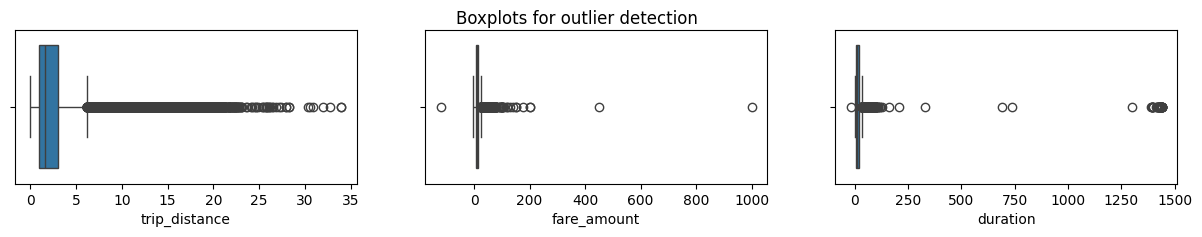

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

Exemplar response:

All three variables contain outliers. Some are extreme, but others not so much.

It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for fare_amount and duration definitely seem to have problematic outliers on the higher end.

Probably not for the latter two, but for trip_distance it might be okay.

Task 2e. Imputations
trip_distance outliers
You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

# Are trip distances of 0 bad data or very short trips rounded down?

In [21]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]